## Experiment-12

## 12.consider mnist dataset preprocess it and build a simple sequantial Neural Network model on it, test and evaluate the model using different metrics 

<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, y_train ,X_test.shape, y_test.shape

((60000, 28, 28),
 array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8),
 (10000, 28, 28),
 (10000,))

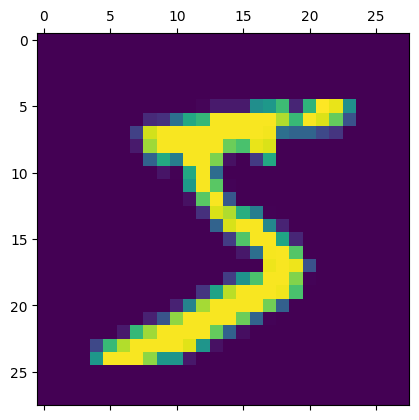

In [4]:
import matplotlib.pyplot as plt

plt.matshow(X_train[0])   # creates the image
plt.show()                # actually displays the image

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [8]:
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\Guru Kiran\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8766 - loss: 0.4714
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9146 - loss: 0.3044
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9204 - loss: 0.2836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9240 - loss: 0.2732
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9251 - loss: 0.2670


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9249 - loss: 0.2674


[0.26744475960731506, 0.9248999953269958]

In [11]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.31749155e-02, 4.47567004e-07, 4.52204160e-02, 9.54810023e-01,
       3.92512884e-03, 9.99573916e-02, 2.21967275e-06, 9.99806225e-01,
       1.19874306e-01, 6.88449085e-01], dtype=float32)

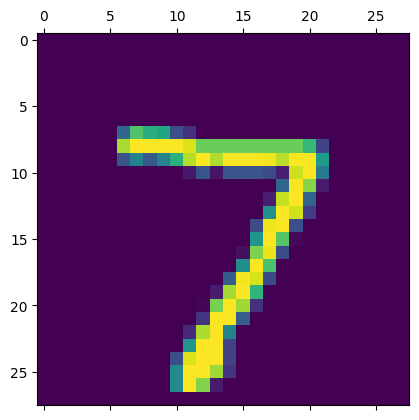

In [12]:
plt.matshow(X_test[0])
plt.show()

**np.argmax finds a maximum element  from an array and returns the index of it**

In [13]:
np.argmax(y_predicted[0])

np.int64(7)

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [15]:
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [16]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    4,    2,    0,    7,   10,    2,    3,    1],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   3,    9,  921,   13,   12,    5,   13,   11,   43,    2],
       [   3,    1,   17,  914,    1,   28,    2,   12,   25,    7],
       [   1,    1,    3,    1,  930,    0,   10,    3,    9,   24],
       [   8,    3,    3,   30,   12,  771,   18,    7,   34,    6],
       [   7,    3,    7,    1,    8,   13,  914,    2,    3,    0],
       [   1,    5,   21,    9,   11,    0,    0,  950,    3,   28],
       [   4,    7,    6,   17,    9,   19,    9,   12,  886,    5],
       [   8,    7,    2,    9,   40,    6,    0,   23,   10,  904]],
      dtype=int32)>

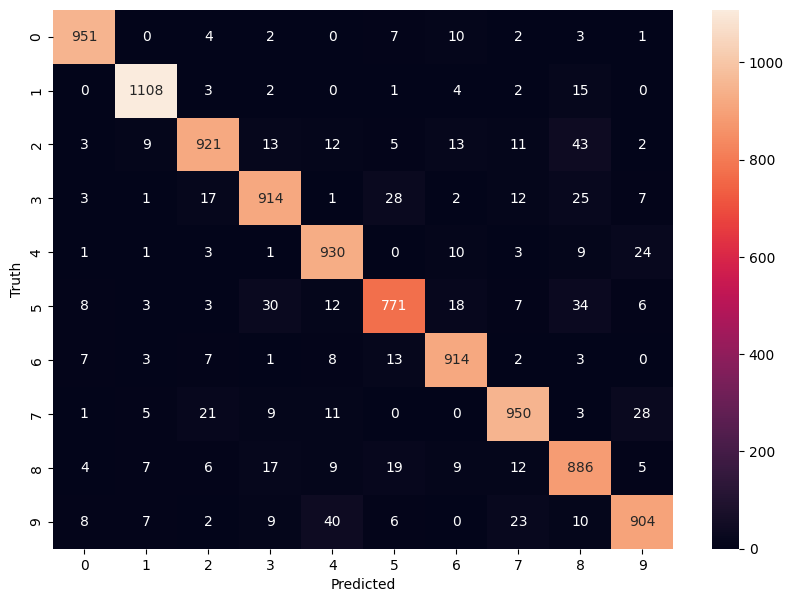

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<h3 style='color:purple'>Using hidden layer</h3>

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\Guru Kiran\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9232 - loss: 0.2710
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9636 - loss: 0.1229
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9731 - loss: 0.0869
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9794 - loss: 0.0656
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9844 - loss: 0.0515


In [19]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9770 - loss: 0.0763


[0.07625898718833923, 0.9769999980926514]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


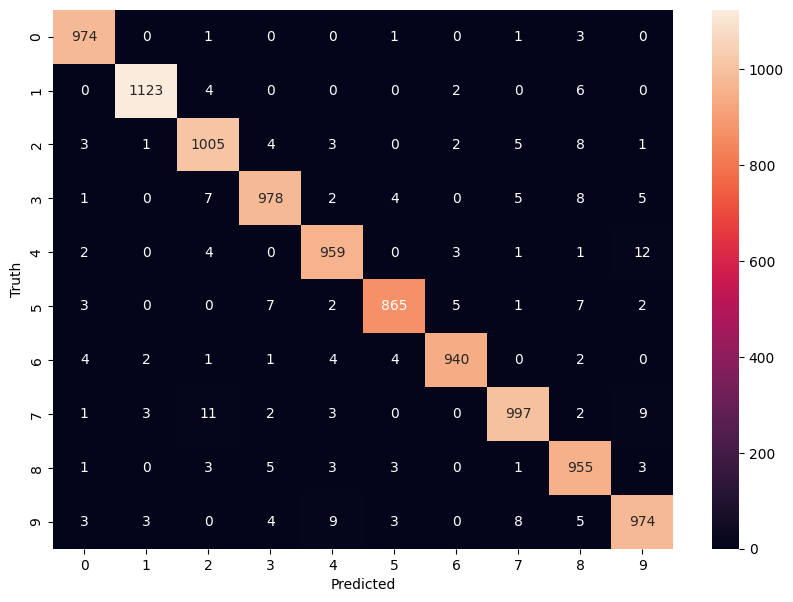

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

C:\Users\Guru Kiran\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9218 - loss: 0.2747
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9639 - loss: 0.1244
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9739 - loss: 0.0865
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9806 - loss: 0.0651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9840 - loss: 0.0519
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9866 - loss: 0.0420
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9887 - loss: 0.0351
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9912 - loss: 0.0283
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9926 - loss: 0.0239
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9938 - loss: 0.0202


In [22]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9754 - loss: 0.0870


[0.0869947299361229, 0.9753999710083008]